Located [here](https://www.google.com/url?q=https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f&sa=D&ust=1480629323595000&usg=AFQjCNFI-9Xs0ozevTsIWfU5YuphOqgyzA) is data on the number of people to go through the turnstiles at every Chicago "L" station since 2001. For those not familiar, the "L" is our system of elevated and subway trains. You can find more data about the stations [here](https://www.google.com/url?q=https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops/8pix-ypme&sa=D&ust=1480629323595000&usg=AFQjCNEOR9vncWy1z9fPVTHXLQV_M0LUDw) and context [here](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Chicago_%2522L%2522&sa=D&ust=1480629323596000&usg=AFQjCNGoq2kLvB3DKJnic40JpuML2yczLw) should you need it.

### The challenge

Imagine you’re a business owner in Chicago looking to open a new location. Any kind of business will do.

In the form of writing, potentially supplemented by sketches (computer-drawn or hand-drawn) and links, we want to see your response to these questions:

* What questions could you potentially explore/answer with this data?
* Ideally, what other data would you gather or combine to learn even more?
* How would you want to see data presented, to make it actionable by you or others?

Furthermore, we want to see the results of 1–3 hours of work, using the real data, towards making those ideas a reality. The results could include findings from the data, code, Jupyter/R notebooks, a spreadsheet, a visualization, results of a statistical model you built, etc. Try not to hide things or throw them away— we want to see your work!

### Some additional guidelines

* We're not expecting perfection here; this is intended to be something you spend an afternoon or so on. Send us whatever you used to tackle the problem, even if it’s not pretty.
* You're not required to use any specific tools— pick your favorites. Excel is just as valid as Python and colored pencils are just as valid as d3. Think of this as an opportunity to showcase your strengths.
* Feel free to aggregate or filter the data however you see fit— if you want to focus on a particular train line, time period, season, stop, neighborhood, etc, go for it. "Big Data" isn't necessarily going to impress us more than a thoughtful approach or interesting findings from a small slice, especially if that aligns with the story you’re telling.

### Why are we doing this?

This challenge is not all that different from what happens at the beginning of a project at Datascope. We have to go from large amounts of ambiguity to valuable work in short periods of time, and we do it by empathizing with the needs of our client, imagining what’s possible, selecting the most promising ideas, and working swiftly and iteratively to share our work early and build towards the bigger ideas. If you find this fun, you’re going to like it here.

This also gives you an opportunity to show us what you’re capable of; this is what we do instead of unrealistic and unreliable whiteboard coding interviews. And afterwards, you’ll have a little data project to add to your portfolio that you can build on further if you want to.

### Submission

Please send your submissions by noon, Central Time, on Tuesday 12/13. I know it's soon, but we don't want you to obsess over this for too long. If you know you won’t have time to work on this between now and then, tell us. You can submit them by replying to this email, either as attachments or links to your work online.

If you have questions or concerns, don't hesitate to email me. Good luck!



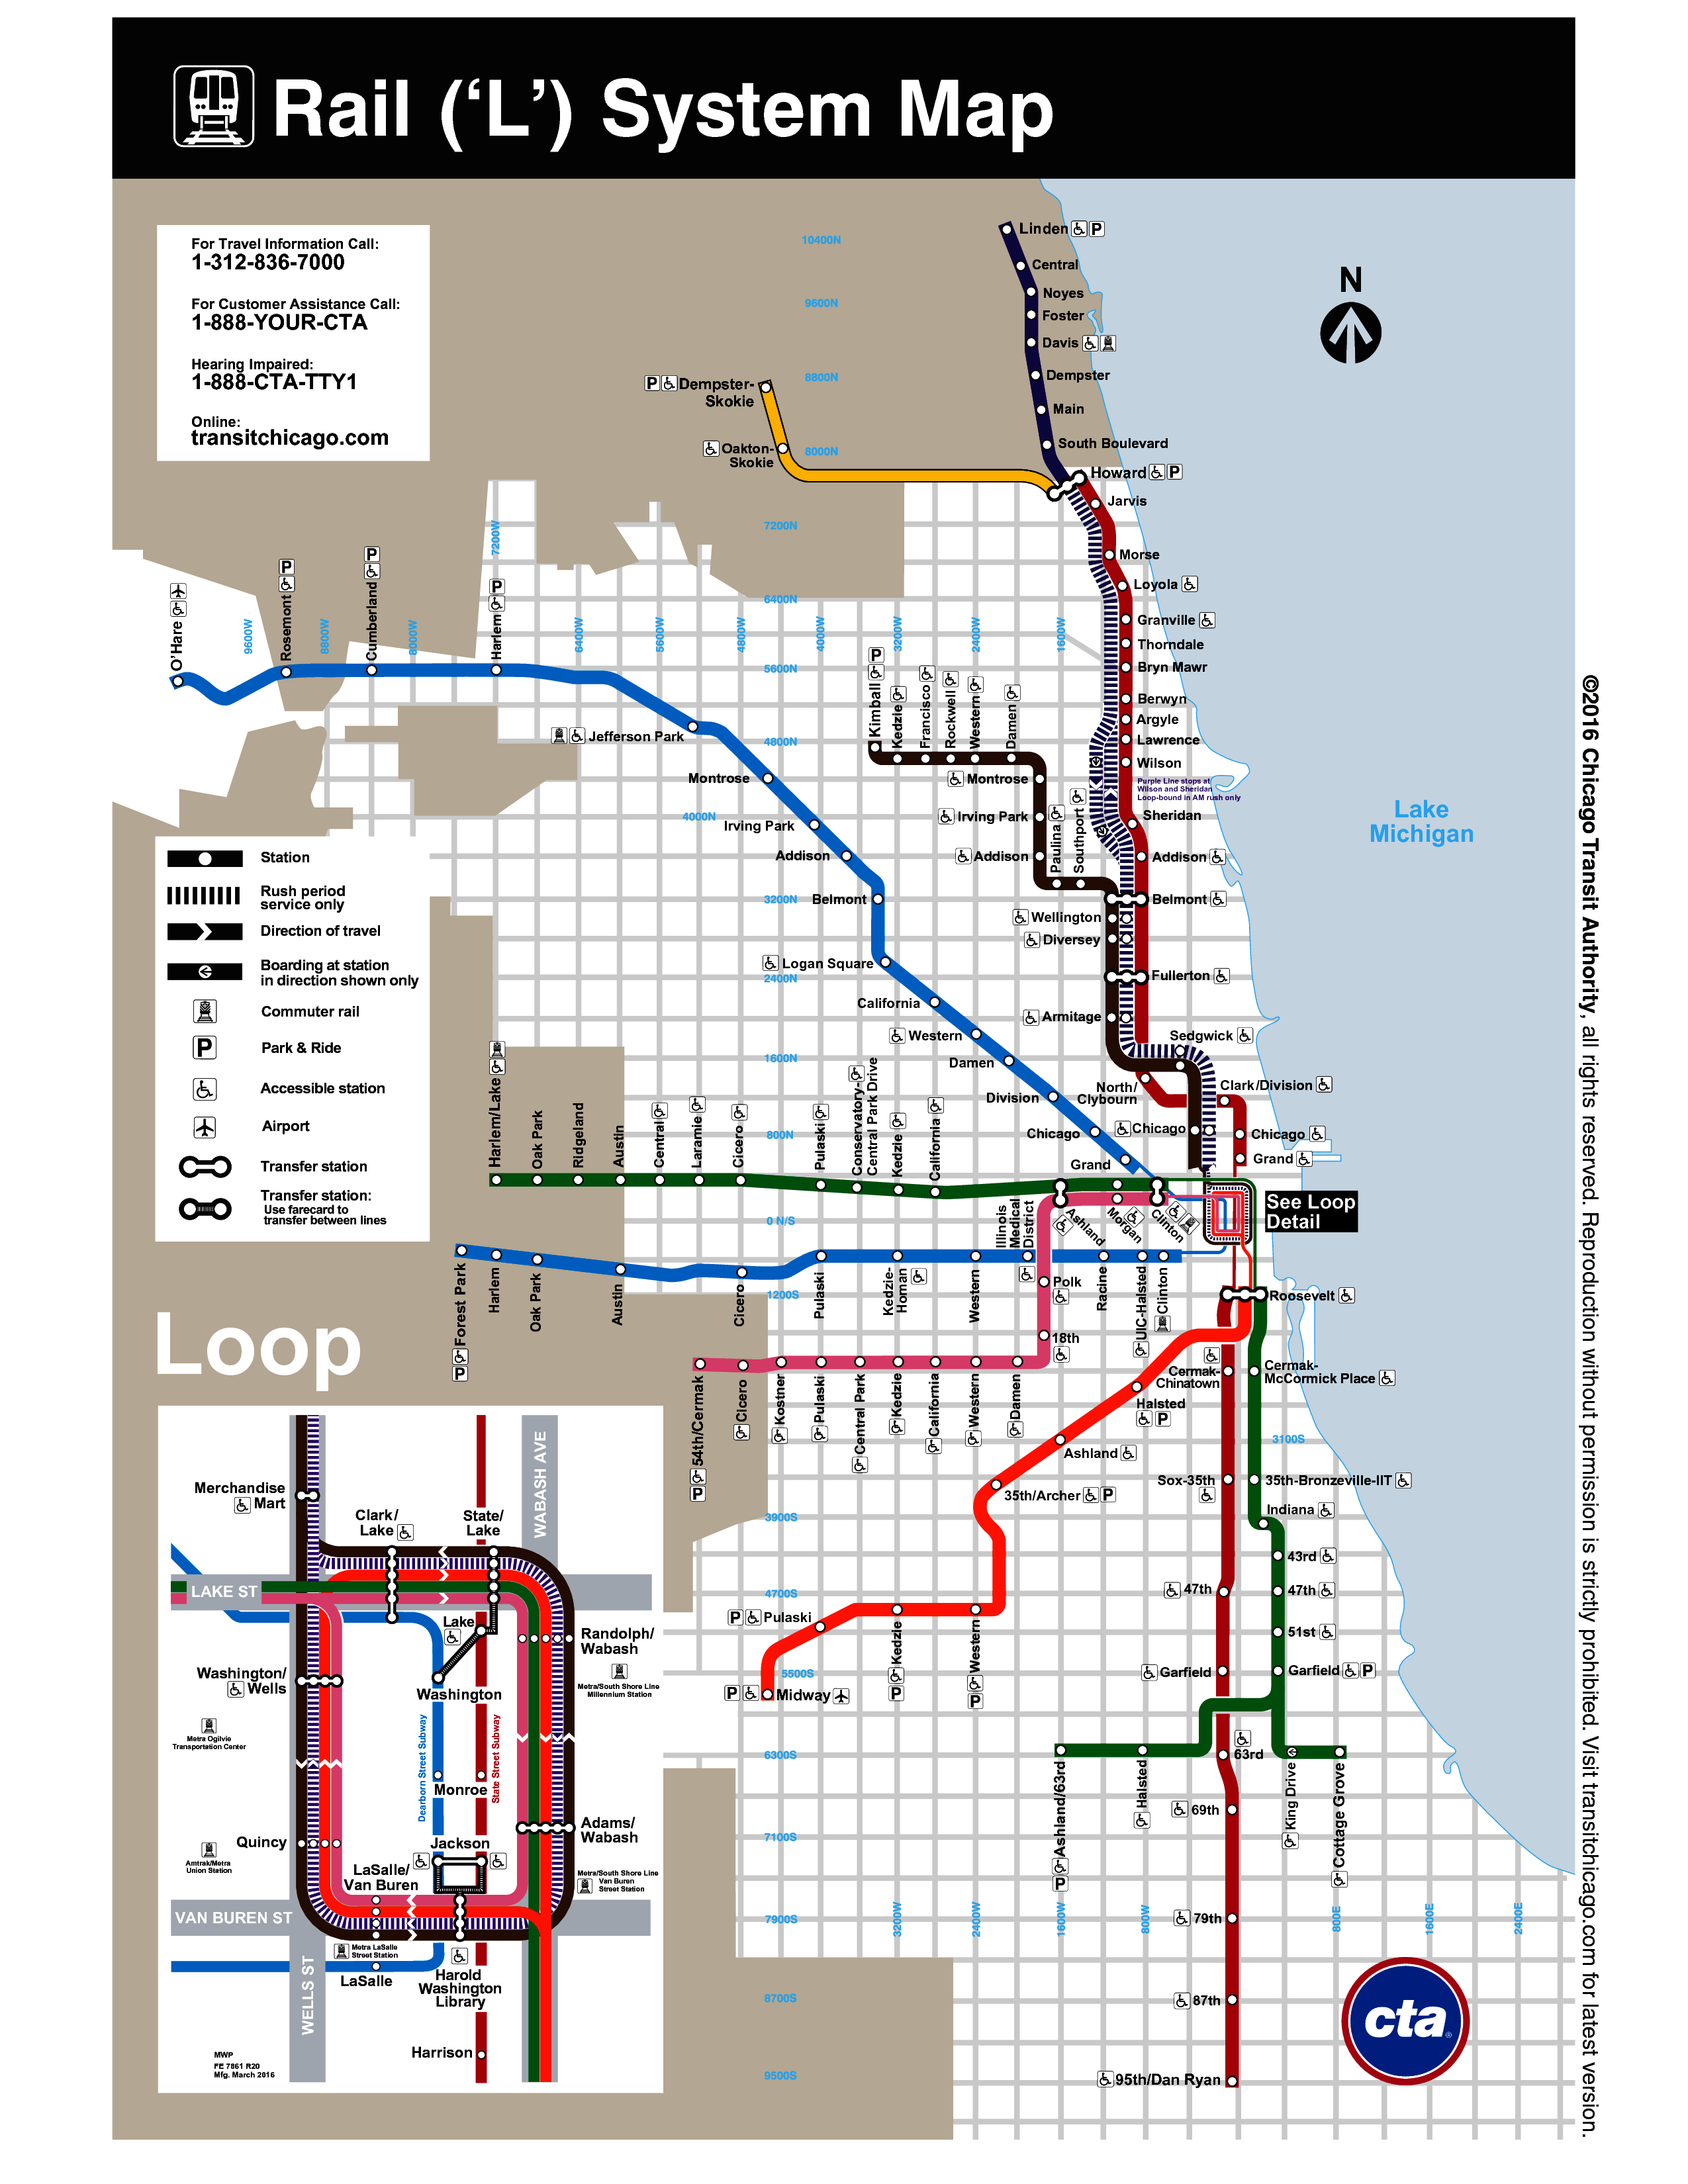

In [17]:
from IPython.display import Image

fig = Image(filename=('./CTA_map.png'))
fig

# CTA Analysis

Chicago has a well-connected public transportation system that serves many of the city's neighborhoods. Regardless, some areas are more accessible than others, which can promote higher foot traffic and more vibrant commercial spaces. As a small business owner, choosing the right location with maximum exposure can mean the difference between boom and bust. The CTA ridership data can be a useful tool to identify pockets of high foot traffic. Some things we would like to find out from this data are:
* which stations see the highest number of riders?
* how steady is the ridership at each station?
* is the total number of riders a good predictor for the ridership at any station?

The data contains daily ridership for all CTA stations since 2001. However, some of those stations are no longer in use. Therefore, we first import the list of active L stops from the "System Information" link.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as sk

In [2]:
def read_csvfile(infile):
    # W=Weekday
    # A=Saturday
    # U=Sunday/Holiday
    data = pd.read_csv(infile)
    return data


# active stations
csvfile = 'CTA_-_System_Information_-_List_of__L__Stops.csv'
active_stations = read_csvfile(csvfile)
print (active_stations.columns)

Index(['STOP_ID', 'DIRECTION_ID', 'STOP_NAME', 'STATION_NAME',
       'STATION_DESCRIPTIVE_NAME', 'MAP_ID', 'ADA', 'RED', 'BLUE', 'G', 'BRN',
       'P', 'Pexp', 'Y', 'Pnk', 'O', 'Location'],
      dtype='object')


## Cluster nearby stations into groups

It is reasonable to assume that this particular business will benefit from increased foot traffic and/or exposure brought on by L riders.
However, we also know that some stations are in close proximity to each other.
Therefore, unless the business relies directly on the patronage of commuters (e.g. an on-the-go coffee kiosk), we can instead think of groups, or clusters, of L stations that could be within close range of a possible business locale.
The grouping of L stations into clusters can be performed any number of ways, and here I will use k-means clustering.
I arbitrarily chose to group the stations into 100 clusters as it seems to be a good balance between grouping many stations while keeping the groups relatively localized.

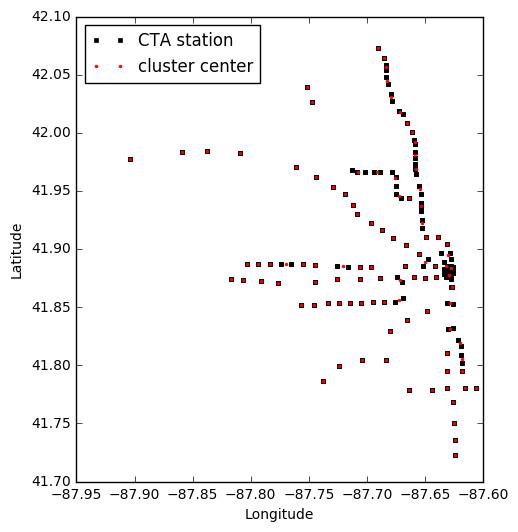

In [3]:
from ast import literal_eval as make_tuple

location = active_stations['Location']
location_list = [make_tuple(i)[::-1] for i in location]

groups = 100
kmeans = sk.KMeans(n_clusters=groups, n_init=50).fit(location_list)
kmeans_cc = kmeans.cluster_centers_

#print (active_stations['MAP_ID'])
#print (kmeans.labels_)
stations_clusters_map = dict(zip(active_stations['MAP_ID'], kmeans.labels_))

# dict that contains mapping of cluster centers to station ids
clusters_stations_map = {}
for k, v in stations_clusters_map.items():
    clusters_stations_map.setdefault(v, []).append(k)
    
# number of stations in each cluster
num_stations_in_cluster = {}
for k,v in clusters_stations_map.items():
    num_stations_in_cluster[k] = len(v)

plt.close('all')
plt.figure(figsize=(6,6))
plt.plot(*zip(*location_list), ls='', marker='s', c='k', ms=3, label='CTA station')
plt.plot(*zip(*kmeans_cc),     ls='', marker='.', c='r', ms=4, label='cluster center')
plt.legend(loc='best')
plt.gca().set_aspect('equal')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

While most of the peripheral stations correspond to a single cluster, note that the loop stations are grouped into only three or four clusters. This seems reasonable, as most of the loop L stops are within easy walking distance from one another. By clustering the stations, we can probe the volume of riders in the general vicinity, while disregarding which exact stop they hop on/off the train.

## Import ridership data.

Here we import the CTA data and simply add a column that indicates which cluster the station belongs to.

In [4]:
def get_ridership_data(csvfile):

    data = read_csvfile(csvfile)
    #print (data)

    # convert date column to pandas datetime format
    data['date'] =  pd.to_datetime(data['date'], format='%m/%d/%Y')

    # assign unique month number
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month + 12*(data['date'].dt.year - 2001) - 1

    # add new column with kmeans cluster labels
    newcol = []
    for i in data['station_id']:
        try:
            newcol.append(stations_clusters_map[i])
        except:
            newcol.append(-1)  # used for stations that are inactive
    data['kmeans_cluster'] = newcol

    print (data.columns)
    
    return data


# ridership data (includes stations that are no longer existing)
csvfile = 'CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv'
data = get_ridership_data(csvfile)

Index(['station_id', 'stationname', 'date', 'daytype', 'rides', 'year',
       'month', 'kmeans_cluster'],
      dtype='object')


For simplicity, I will focus only on monthly ridership numbers. This will also help eliminate fluctuations due to:
* variation in ridership between weekdays and weekends
* rental leases affecting the monthly population of a neighborhood
* temporary CTA commuter passes that are limited to 30-day passes


In [18]:
agg = {}
agg['station_id'] = 'unique'
agg['stationname'] = 'unique'
agg['date'] = 'first'
#agg['daytype'] = 'unique'
agg['rides'] = 'sum'
agg['year'] = 'first'
#agg['month'] = 'first'
#agg['kmeans_cluster'] ='first'
monthly_data = data.groupby(('kmeans_cluster', 'month'), as_index=False).agg(agg)

print (monthly_data)

       kmeans_cluster  month                stationname   rides  \
0                  -1      0         [Washington/State]  167567   
1                  -1      1         [Washington/State]  156790   
2                  -1      2         [Washington/State]  181822   
3                  -1      3         [Washington/State]  169191   
4                  -1      4         [Washington/State]  185618   
5                  -1      5         [Washington/State]  190607   
6                  -1      6  [Washington/State, Homan]  191040   
7                  -1      7         [Washington/State]  193217   
8                  -1      8         [Washington/State]  167560   
9                  -1      9         [Washington/State]  199486   
10                 -1     10         [Washington/State]  185129   
11                 -1     11         [Washington/State]  191181   
12                 -1     12         [Washington/State]  179644   
13                 -1     13         [Washington/State]  16389

## Identify busiest stations for 2016

The first thing we can use the CTA ridership data for is to identify the busiest stations in the current year.

Cluster:   4  Ave Monthly Riders (2015):  1744159
Cluster:  57  Ave Monthly Riders (2015):  1442638
Cluster:  35  Ave Monthly Riders (2015):   967100
Cluster:  82  Ave Monthly Riders (2015):   852520
Cluster:  40  Ave Monthly Riders (2015):   582260
Cluster:  16  Ave Monthly Riders (2015):   456372
Cluster:  36  Ave Monthly Riders (2015):   406788
Cluster:  34  Ave Monthly Riders (2015):   346527
Cluster:   6  Ave Monthly Riders (2015):   337809
Cluster:  59  Ave Monthly Riders (2015):   318001
Cluster:  12  Ave Monthly Riders (2015):   306351
Cluster:  25  Ave Monthly Riders (2015):   237155
Cluster:  17  Ave Monthly Riders (2015):   232563
Cluster:  63  Ave Monthly Riders (2015):   232011
Cluster:  46  Ave Monthly Riders (2015):   221726
Cluster:  98  Ave Monthly Riders (2015):   213913
Cluster:  54  Ave Monthly Riders (2015):   208989
Cluster:   5  Ave Monthly Riders (2015):   202388
Cluster:   0  Ave Monthly Riders (2015):   201604
Cluster:  18  Ave Monthly Riders (2015):   198243


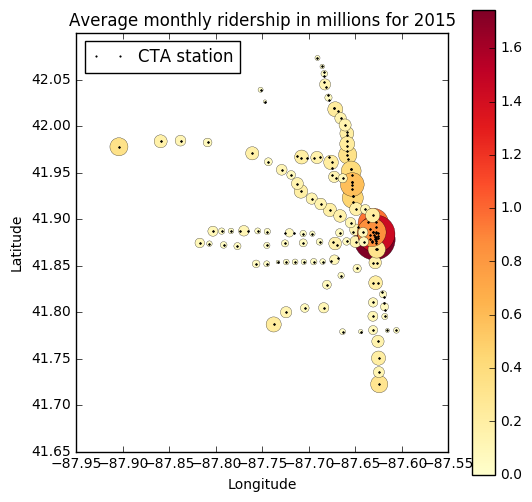

In [6]:
def monthly_ave_for_year(year):

    plt.close('all')
    plt.figure(figsize=(6,6))
    plt.plot(*zip(*location_list), ls='', marker='.', c='k', ms=2, label='CTA station')

    by_cluster_year = monthly_data.groupby(('kmeans_cluster', 'year'))

    ave_riders_by_month = []
    crd_x = []
    crd_y = []
    for _cluster in range(groups):
        try:
            tmp = by_cluster_year.get_group((_cluster, year)).mean()['rides']
            ave_riders_by_month.append((_cluster, tmp))
            long, lat = kmeans_cc[_cluster]
            crd_x.append(long)
            crd_y.append(lat)
        except:
            pass
    
    riders = 1e-6 * np.array([i[1] for i in ave_riders_by_month])
    sorted_riders = sorted(ave_riders_by_month, key=lambda x: x[1], reverse=True)
    top20 = sorted_riders[:20]
    for i in top20:
        print ('Cluster: {0:3}  Ave Monthly Riders ({1}): {2:8.0f}'.format(i[0], year, i[1]))

    return crd_x, crd_y, riders, ave_riders_by_month, top20, year


crd_x, crd_y, riders, cluster_riders, top20, year = monthly_ave_for_year(2015)
plt.scatter(crd_x, crd_y, s=500*riders, c=riders, edgecolor='k', lw=.2, cmap=plt.cm.YlOrRd)

plt.colorbar()
plt.clim(0)
plt.legend(loc='best')
plt.gca().set_aspect('equal')
plt.title('Average monthly ridership in millions for {}'.format(year))
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.show()

I have plotted the locations of the CTA stations along with the 100 clusters I obtained using k-means clustering.
The colored circles represent the location of the cluster center as well as the average number of monthly riders for the given year to easily identify the busiest station clusters. The area of the circles are proportional to the monthly ridership at that cluster. The colors also correspond to the monthly ridership at each cluster and the units of the colorbar are in millions of riders.

It comes as no surprise that the clusters corresponding to the loop L stations are the busiest on average. The red line stations north of the loop are also host to larger number of riders than any of the other lines. Other stations of note are the O'hare (-87.90, 41.98) and Midway (-87.72, 41.79) airport stations.


## Variance

Besides the raw number of riders that enter or exit an L station, we also want to know whether the number of riders is relatively stable on a month-to-month basis. We can replot the previous figure, but this time using the percent standard deviation to color each circle. For the standard deviation, I used only data from the previous five years to eliminate long-term trends in neighborhood demographics and population. The area of the circle still represents the average monthly ridership for the current year (2016).

Cluster:   4  Ave Monthly Riders (2016):  1748155
Cluster:  57  Ave Monthly Riders (2016):  1389335
Cluster:  35  Ave Monthly Riders (2016):   951658
Cluster:  82  Ave Monthly Riders (2016):   870628
Cluster:  40  Ave Monthly Riders (2016):   583987
Cluster:  16  Ave Monthly Riders (2016):   463370
Cluster:  36  Ave Monthly Riders (2016):   408266
Cluster:  34  Ave Monthly Riders (2016):   339033
Cluster:   6  Ave Monthly Riders (2016):   325108
Cluster:  59  Ave Monthly Riders (2016):   313773
Cluster:  12  Ave Monthly Riders (2016):   289131
Cluster:  46  Ave Monthly Riders (2016):   229715
Cluster:  98  Ave Monthly Riders (2016):   229222
Cluster:  25  Ave Monthly Riders (2016):   228411
Cluster:  63  Ave Monthly Riders (2016):   228369
Cluster:  17  Ave Monthly Riders (2016):   205304
Cluster:   5  Ave Monthly Riders (2016):   202583
Cluster:   0  Ave Monthly Riders (2016):   197757
Cluster:  54  Ave Monthly Riders (2016):   195701
Cluster:  20  Ave Monthly Riders (2016):   191459


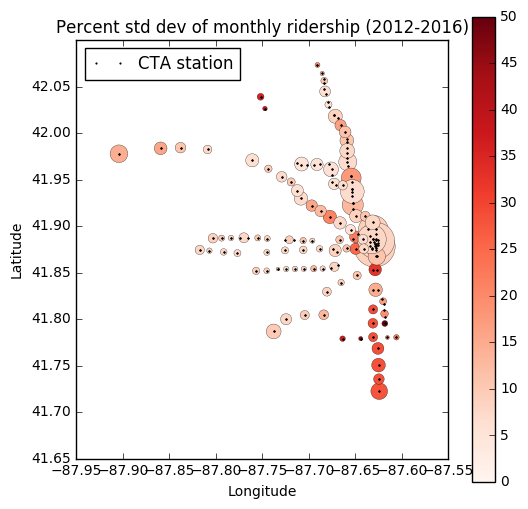

In [7]:
def get_stddev():
    last_5yrs = (monthly_data[monthly_data['year']>2011])
    by_cluster = last_5yrs.groupby(('kmeans_cluster'), as_index=False)
    stddev = []
    for _cluster in range(groups):
        try:
            # get standard deviation for cluster
            stddev_ = by_cluster.get_group(_cluster).std()['rides'] / by_cluster.get_group(_cluster).mean()['rides'] * 100
            stddev.append(stddev_)
        except:
            pass
    return stddev
    


crd_x, crd_y, riders, cluster_riders, top20, year = monthly_ave_for_year(2016)

colors = get_stddev()
plt.scatter(crd_x, crd_y, s=500*riders, c=colors, edgecolor='k', lw=.2, cmap=plt.cm.Reds)

plt.colorbar()
plt.clim(0, 50)
plt.legend(loc='best')
plt.gca().set_aspect('equal')
plt.title('Percent std dev of monthly ridership (2012-2016)')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.show()

The standard deviation map shows that the monthly ridership is relatively stable for most of the map. The exceptions are the red and green lines south of the loop where the deviation is greater than (roughly) 25% of the ridership. The reason for this is not clear, but could be the result of seasonal surges. If the business in question is also seasonal, this could in fact be beneficial. This would require further analysis.

## Calculate correlation

Ideally, the CTA data set would provide a way to identify hotspots or "trendy" L stations.
At a minimum, we could use the data set to determine whether the system-wide CTA ridership is a good indicator of the ridership at a specific cluster of L stations.
Perhaps, this could help identify neighborhoods that follow the growth trends of the city.


In [8]:
def analyze_clusters(by_cluster):
    
    def single_cluster(_cluster):

        ridecounts = []
        for _month in np.unique(monthly_data['month']):
            try:
                ridecount = by_cluster_month.get_group((_cluster, _month))['rides'].mean()
            except:
                ridecount = np.nan
                
            ridecounts.append(ridecount)
        return np.array(ridecounts)
    
    total = 0
    series = {}
    for _cluster in range(groups):
        monthly_riders = single_cluster(_cluster)
        series[_cluster] = monthly_riders
        if np.count_nonzero(np.isnan(monthly_riders))>10:
            print ('omitting cluster {} -- too many NaNs'.format(_cluster))
        else:
            total += monthly_riders
    series['all'] = total
    
    df = pd.DataFrame(series)
    deltas = df.diff(periods=1, axis=0) / df

    return df, deltas

by_cluster_month = monthly_data.groupby(['kmeans_cluster','month'])
df, deltas = analyze_clusters(by_cluster_month)


omitting cluster 13 -- too many NaNs


/home/vargaslo/anaconda3/lib/python3.5/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


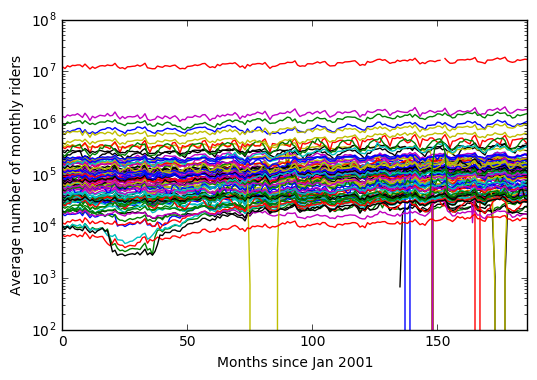

In [9]:
df.plot()
plt.gca().set_yscale('log')
plt.gca().legend_.remove()
plt.ylabel('Average number of monthly riders')
plt.xlabel('Months since Jan 2001')
plt.show()

This figure shows the average number of monthly riders for each month since 2001.
Each curve represents a cluster of stations, with the exception of the red curve that is the sum total of all CTA riders per month.
The aim is to identify the correlation between the monthly changes in overall CTA ridership and those of a particular cluster of stations.
To do so, we first calculate the percent change in monthly ridership for each cluster of stations.
Then, we compute the coefficient of determination (R$^2$) for each cluster.

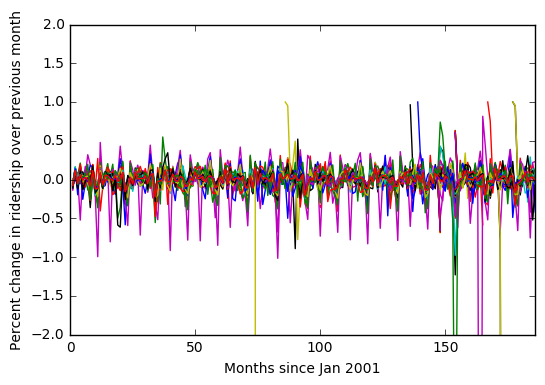

In [10]:
plt.close('all')
deltas.plot()
plt.ylim(-2,2)
plt.gca().legend_.remove()
plt.ylabel('Percent change in ridership over previous month')
plt.xlabel('Months since Jan 2001')
plt.show()

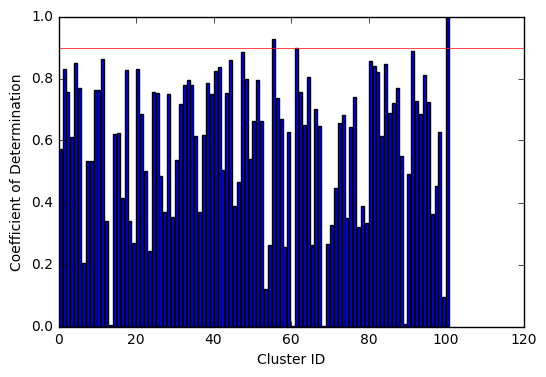

In [11]:
corr = deltas.corr()

plt.close('all')
plt.bar(range(len(np.array(corr['all']))), np.array(corr['all']**2))
plt.axhline(.9, c='r', lw=.5)
plt.xlabel('Cluster ID')
plt.ylabel('Coefficient of Determination')
plt.show()

In [12]:
for i in top20:
    print ('cluster: {0:3}  ave_monthly_riders:{1:8.0f}  rsq:{2:6.3f}'.format(i[0], i[1], corr['all'][i[0]]**2))

cluster:   4  ave_monthly_riders: 1748155  rsq: 0.849
cluster:  57  ave_monthly_riders: 1389335  rsq: 0.670
cluster:  35  ave_monthly_riders:  951658  rsq: 0.614
cluster:  82  ave_monthly_riders:  870628  rsq: 0.822
cluster:  40  ave_monthly_riders:  583987  rsq: 0.825
cluster:  16  ave_monthly_riders:  463370  rsq: 0.414
cluster:  36  ave_monthly_riders:  408266  rsq: 0.368
cluster:  34  ave_monthly_riders:  339033  rsq: 0.780
cluster:   6  ave_monthly_riders:  325108  rsq: 0.205
cluster:  59  ave_monthly_riders:  313773  rsq: 0.628
cluster:  12  ave_monthly_riders:  289131  rsq: 0.341
cluster:  46  ave_monthly_riders:  229715  rsq: 0.467
cluster:  98  ave_monthly_riders:  229222  rsq: 0.627
cluster:  25  ave_monthly_riders:  228411  rsq: 0.752
cluster:  63  ave_monthly_riders:  228369  rsq: 0.649
cluster:  17  ave_monthly_riders:  205304  rsq: 0.828
cluster:   5  ave_monthly_riders:  202583  rsq: 0.769
cluster:   0  ave_monthly_riders:  197757  rsq: 0.571
cluster:  54  ave_monthly_ri

In [13]:
# dict that contains mapping of cluster centers to station ids
clusters_stations_map = {}
for k, v in stations_clusters_map.items():
    clusters_stations_map.setdefault(v, []).append(k)

for i in top20:
    print ('cluster:{}  r2:{}'.format(i[0], corr['all'][i[0]]**2))
    for j in clusters_stations_map[i[0]]:
        idx = active_stations[active_stations['MAP_ID'] == j].index.tolist()
        print (active_stations.loc[idx]['STATION_DESCRIPTIVE_NAME'])
    print ('-------')


cluster:4  r2:0.8488234415325938
191    Monroe (Blue Line)
194    Monroe (Blue Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
120    Harrison (Red Line)
121    Harrison (Red Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
139    Jackson (Red Line)
140    Jackson (Red Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
216    Quincy/Wells (Brown, Orange, Purple & Pink Lines)
217    Quincy/Wells (Brown, Orange, Purple & Pink Lines)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
163    LaSalle (Blue Line)
164    LaSalle (Blue Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
192    Monroe (Red Line)
193    Monroe (Red Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
137    Jackson (Blue Line)
138    Jackson (Blue Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
125    Harold Washington Library-State/Van Buren (Bro...
292    Harold Washington Library-State/Van Buren (Bro...
Name: STATION_DESCRIPTIVE_NAME, dtype: object
165    LaSalle/Van Buren (Brown, Orange, Purple & Pin..

Cluster:   4  Ave Monthly Riders (2016):  1748155
Cluster:  57  Ave Monthly Riders (2016):  1389335
Cluster:  35  Ave Monthly Riders (2016):   951658
Cluster:  82  Ave Monthly Riders (2016):   870628
Cluster:  40  Ave Monthly Riders (2016):   583987
Cluster:  16  Ave Monthly Riders (2016):   463370
Cluster:  36  Ave Monthly Riders (2016):   408266
Cluster:  34  Ave Monthly Riders (2016):   339033
Cluster:   6  Ave Monthly Riders (2016):   325108
Cluster:  59  Ave Monthly Riders (2016):   313773
Cluster:  12  Ave Monthly Riders (2016):   289131
Cluster:  46  Ave Monthly Riders (2016):   229715
Cluster:  98  Ave Monthly Riders (2016):   229222
Cluster:  25  Ave Monthly Riders (2016):   228411
Cluster:  63  Ave Monthly Riders (2016):   228369
Cluster:  17  Ave Monthly Riders (2016):   205304
Cluster:   5  Ave Monthly Riders (2016):   202583
Cluster:   0  Ave Monthly Riders (2016):   197757
Cluster:  54  Ave Monthly Riders (2016):   195701
Cluster:  20  Ave Monthly Riders (2016):   191459


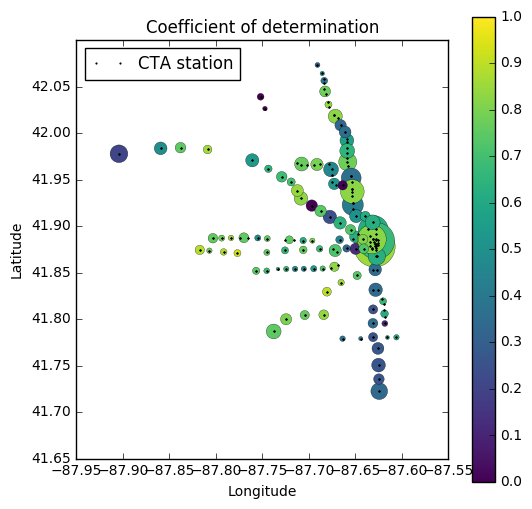

In [14]:
crd_x, crd_y, riders, cluster_riders, top20, year = monthly_ave_for_year(2016)

rsq = [corr['all'][i]**2 for i in range(groups)]
colors = rsq
plt.scatter(crd_x, crd_y, s=500*riders, c=colors, edgecolor='k', lw=.2, cmap=plt.cm.viridis)

plt.colorbar()
plt.clim(0, 1)
plt.legend(loc='best')
plt.gca().set_aspect('equal')
plt.title('Coefficient of determination')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.show()

In [15]:
idx = np.argsort(corr['all']**2)[::-1]
for i in idx:
  if i!=100:
    for j in clusters_stations_map[i]:
        idx = active_stations[active_stations['MAP_ID'] == j].index.tolist()
        print (corr['all'][i]**2,active_stations.loc[idx]['STATION_DESCRIPTIVE_NAME'])
    print ('-------')


0.927450832291 35    Austin (Blue Line)
36    Austin (Blue Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
-------
0.897905667429 2    35th/Archer (Orange Line)
3    35th/Archer (Orange Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
-------
0.887295704571 94    Forest Park (Blue Line)
95    Forest Park (Blue Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
-------
0.886089949201 200    Oak Park (Blue Line)
201    Oak Park (Blue Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
-------
0.86335135491 116    Harlem (Blue Line - O'Hare Branch)
117    Harlem (Blue Line - O'Hare Branch)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
-------
0.859589870924 29    Ashland (Orange Line)
32    Ashland (Orange Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
-------
0.857184055426 223    Ridgeland (Green Line)
224    Ridgeland (Green Line)
Name: STATION_DESCRIPTIVE_NAME, dtype: object
-------
0.848823441533 191    Monroe (Blue Line)
194    Monroe (Blue Line)
Name: STATION_DESCRIPTI

The coefficients of determination are perhaps not as useful as I had first envisioned.
The stations with the highest coefficients are the blue line terminal stations (Forest Park, Harlem, Oak Park, Austin). Meanwhile, the stations with the lowest coefficients are the yellow line stations Oakton-Skokie and Dempster-Skokie and the California blue line station. 
Without further analysis, it is not likely that this metric helps us identify any hotspots along the CTA lines. 

In this analysis, we have assumed that CTA ridership is a good proxy for the number of people in a certain location.
For a more realistic study, we would want to augment this CTA data with census data to get a better estimate of the population density of Chicago.

Pairwise comparisons between station clusters could provide


